In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(10.0, 7.0))

In [56]:
report_all = pd.read_csv("../report.csv", sep = "," , decimal=".")
report = report_all[report_all["exceptions"] != True]

In [57]:
lessArea = report[(report["heuristic"] == "LessArea") ]
lessArea

,heuristic,points,hyperplane_budget,jaccard_index,time,exceptions
6,LessArea,4,3,0.000000,4331103.0,False
14,LessArea,4,3,0.000000,1647142.0,False
22,LessArea,4,3,0.000000,895015.0,False
30,LessArea,4,3,0.792209,926948.0,False
38,LessArea,4,3,0.771613,741555.0,False
...,...,...,...,...,...,...
13470,LessArea,29,9,0.597095,14119863.0,False
13478,LessArea,29,10,0.599334,13346206.0,False
13486,LessArea,29,11,0.599746,12700433.0,False
13494,LessArea,29,12,0.602697,13166593.0,False


In [70]:
def remove_outliers(group):
    Q1 = group['time'].quantile(0.25)
    Q3 = group['time'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definisci i limiti inferiori e superiori per identificare gli outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return group[(group['time'] >= lower_bound) & (group['time'] <= upper_bound)]

# Raggruppa per 'heuristic' e applica la funzione di rimozione degli outlier
df_no_outliers = report.groupby('heuristic').apply(remove_outliers)
df_no_outliers



heuristic  points  hyperplane_budget  jaccard_index  \
heuristic                                                                    
CuttingEdges 29     CuttingEdges       4                  3       0.792209   
             37     CuttingEdges       4                  3       0.909134   
             53     CuttingEdges       5                  4       0.996234   
             61     CuttingEdges       5                  3       0.463533   
             77     CuttingEdges       5                  3       0.947756   
...                          ...     ...                ...            ...   
LessArea     13470      LessArea      29                  9       0.597095   
             13478      LessArea      29                 10       0.599334   
             13486      LessArea      29                 11       0.599746   
             13494      LessArea      29                 12       0.602697   
             13502      LessArea      29                 13       0.909462   

                          time  exceptions  
heuristic                                   
CuttingEdges 29       122636.0       False  
             37        64319.0       False  
             53       114858.0       False  
             61       116204.0       False  
             77        90587.0       False  
...                        ...         ...  
LessArea     13470  14119863.0       False  
             13478  13346206.0       False  
             13486  12700433.0       False  
             13494  13166593.0       False  
             13502  12494786.0       False  

[12667 rows x 6 columns]

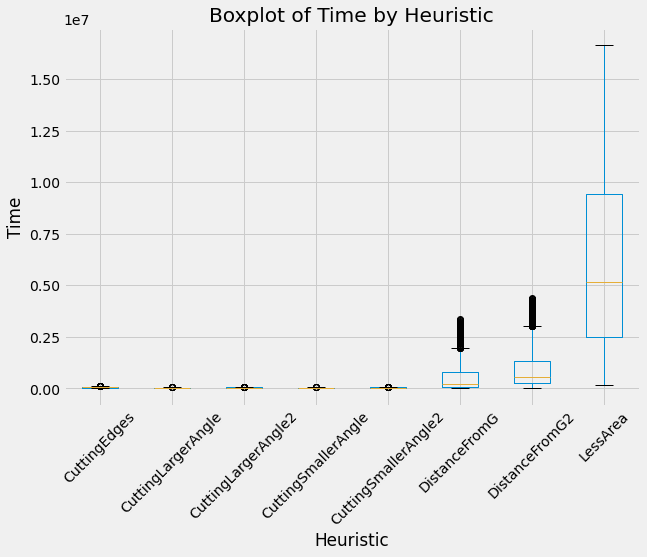

In [59]:
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers.boxplot(column='time', by='heuristic', grid=False)
plt.title('Boxplot of Time by Heuristic')
plt.suptitle('')  # Remove the default title to clean up the plot
plt.xlabel('Heuristic')
plt.grid(True)
plt.ylabel('Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('../media/report/bxplt_time.pdf')
plt.show()

In [72]:
media_per_euristica = report.groupby('heuristic')['jaccard_index'].mean()

print(media_per_euristica)


heuristic
CuttingEdges            0.945039
CuttingLargerAngle      0.909882
CuttingLargerAngle2     0.911158
CuttingSmallerAngle     0.447547
CuttingSmallerAngle2    0.475328
DistanceFromG           0.670711
DistanceFromG2          0.903066
LessArea                0.747384
Name: jaccard_index, dtype: float64


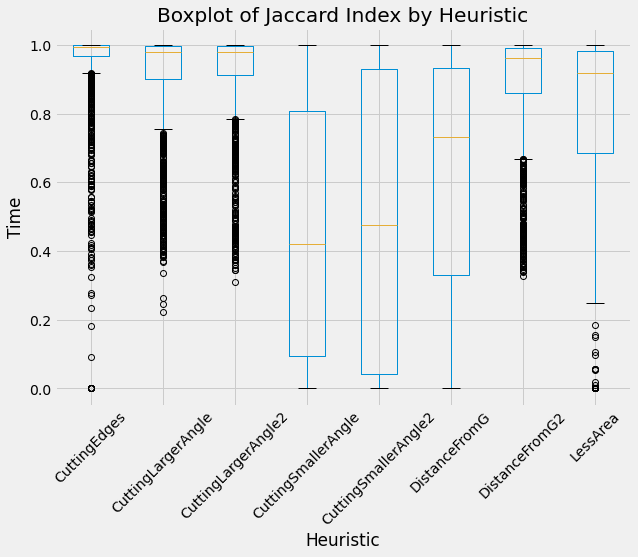

In [60]:
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers.boxplot(column='jaccard_index', by='heuristic', grid=False)
plt.title('Boxplot of Jaccard Index by Heuristic')
plt.suptitle('')  # Remove the default title to clean up the plot
plt.xlabel('Heuristic')
plt.grid(True)
plt.ylabel('Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('../media/report/bxplt_jaccard.pdf')
plt.show()

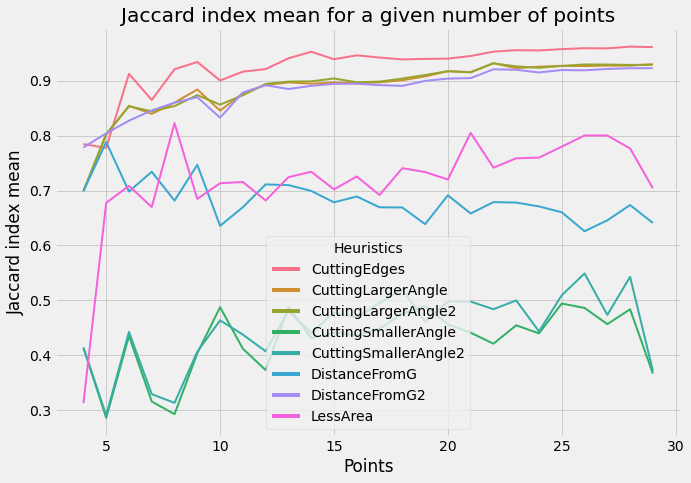

In [63]:
# Raggruppa e calcola le medie
grouped_df = combined_df.groupby(['heuristic', 'points'])['jaccard_index'].mean().reset_index()

# Crea il grafico a linee
sns.lineplot(data=grouped_df, x = 'points', y = 'jaccard_index', hue = 'heuristic', linewidth = 2)
plt.title('Jaccard index mean for a given number of points')
plt.xlabel('Points')
plt.ylabel('Jaccard index mean')
plt.legend(title = 'Heuristics')
plt.savefig('../media/report/Accuracy_plot.pdf')
plt.show()

No handles with labels found to put in legend.


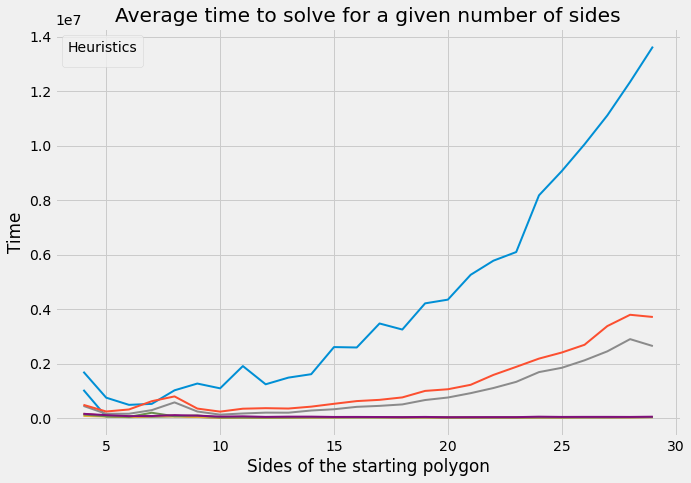

In [65]:
heuristics = report["heuristic"].unique()

for h in heuristics:
    selected = report[report["heuristic"] == h]
    y = selected.groupby("points")
    plt.plot(y["points"].unique(), y["time"].mean(), linewidth = 2)

plt.xlabel('Sides of the starting polygon')
plt.ylabel('Time')
plt.legend(title='Heuristics')
plt.title('Average time to solve for a given number of sides')
plt.savefig('../media/report/Time_plot.pdf')
plt.show()

No handles with labels found to put in legend.


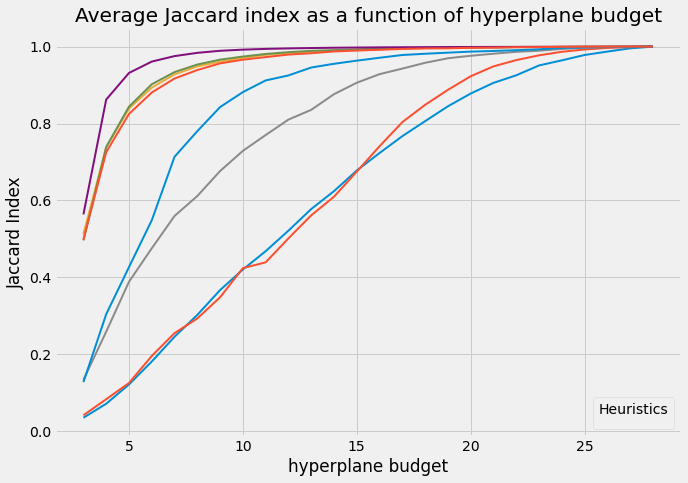

In [67]:
heuristics = report["heuristic"].unique()

for h in heuristics:
    selected = report[report["heuristic"] == h]
    # Group by heuristic and binned points, then calculate the mean of "jaccard_index"
    grouped_df = selected.groupby(['heuristic', 'hyperplane_budget'])['jaccard_index'].mean().reset_index()

    # Plot the binned data
    plt.plot(grouped_df['hyperplane_budget'], grouped_df['jaccard_index'], linewidth = 2)

plt.xlabel('hyperplane budget')
plt.ylabel('Jaccard Index')
plt.legend(title='Heuristics')
plt.title('Average Jaccard index as a function of hyperplane budget')
plt.savefig('../media/report/Budget_variation.pdf')
plt.show()